In [ ]:
##Régréssion Lineaire

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

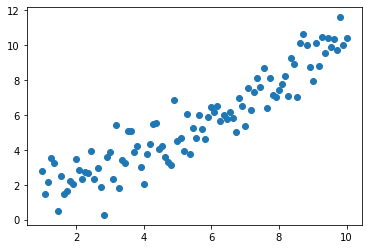

In [2]:
np.random.seed(0)
m=100
X=np.linspace(1,10,m).reshape(m,1)
y = X + np.random.randn(m,1)
plt.scatter(X,y)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [4]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)
predictions = model.predict(X)

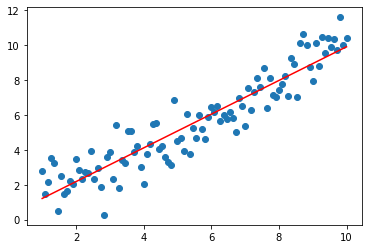

In [5]:

plt.scatter(X,y)
plt.plot(X, predictions, c='r')

In [6]:
#Probleme de regression polynomiale

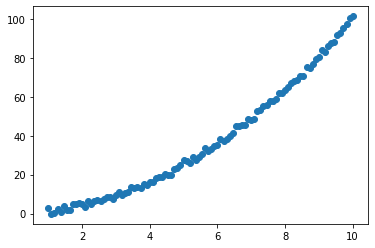

In [7]:

y = X**2 + np.random.randn(m,1)
plt.scatter(X,y)

In [8]:
model = SVR(C=100)
model.fit(X,y)
model.score(X,y)
predictions = model.predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


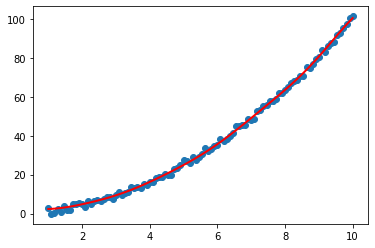

In [9]:

plt.scatter(X,y)
plt.plot(X, predictions, c='r', lw=2)

In [10]:
#Probleme de classification
#Classification KNN

In [11]:
import pandas as pd
import seaborn as sns

In [12]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

In [13]:
titanic = titanic[['survived' , 'pclass' , 'sex' , 'age']]
titanic.dropna(axis=0 , inplace=True)
titanic['sex'].replace(['male' , 'female'] , [ 0 , 1], inplace=True)
titanic.head()

/tmp/ipykernel_2698/1065117352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(axis=0 , inplace=True)
/tmp/ipykernel_2698/1065117352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex'].replace(['male' , 'female'] , [ 0 , 1], inplace=True)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:

y=titanic['survived']
X=titanic.drop('survived' , axis=1)

In [16]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

Meilleutr:  0.834733893557423


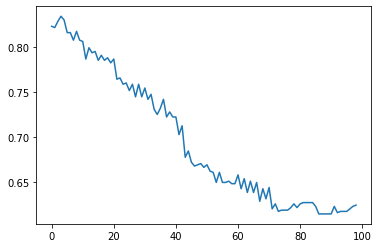

In [17]:
res=[]
max=0
sc=0
for i in range(1 ,100) :
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X,y)
    sc = model.score(X,y)
    res.append(sc)
    
    if sc > max :
        max=sc

print('Meilleutr: ',max)
plt.plot(res)

In [18]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
model.score(X,y)

0.8235294117647058

In [19]:
def survie(model , pclass=3 , sex=0 , age=26) :
    x=np.array([pclass , sex , age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [20]:
survie(model, pclass=3, sex=0, age=23)

[0]
[[1. 0.]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [21]:
from sklearn.datasets import load_iris
iris =load_iris()
X=iris.data
y=iris.target


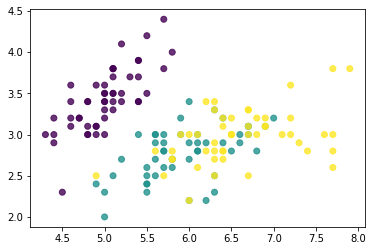

In [22]:
plt.scatter(X[: , 0] , X[: , 1] , c=y , alpha=0.8)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
Xtrain,Xtest, ytrain, ytest =train_test_split(X , y , test_size=0.2 , random_state= 5) 


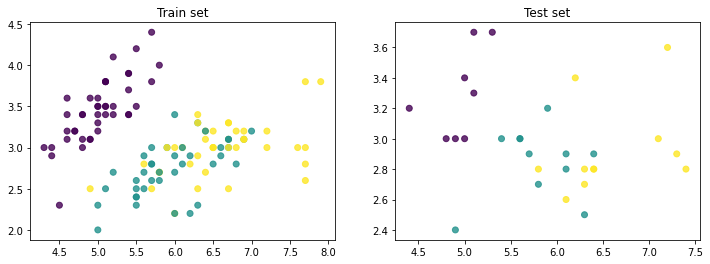

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Train set')
plt.scatter(Xtrain[:,0], Xtrain[:,1], c=ytrain, alpha=0.8)
plt.subplot(122)
plt.title('Test set')
plt.scatter(Xtest[:,0], Xtest[:,1], c=ytest, alpha=0.8)
plt.show()

In [26]:
model =KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain,ytrain)
print('Train score :' ,model.score(Xtrain, ytrain))
print('Test score :' ,model.score(Xtest, ytest))

Train score : 1.0
Test score : 0.9
